# This notebook is based on the results of `analyze-topic-sentiment.ipynb`

We have discovered a number of topics that either have a positive or negative correlation regarding their monthly sentiments between french and german articles. 

Now we investigate what kind of topics those are.

### Top 5 positive correlation:
| Topic | Correlation | Normalized Average German Sentiment | Normalized Average French Sentiment |
|-------|-------------|-------------------------------------|-------------------------------------|
| 19    | 0.5031      | -0.133739                           | 0.714035                            |
| 54    | 0.390643    | -7.371673                           | 0.088158                            |
| 167   | 0.356676    | 0.358158                            | -0.467406                           |
| 22    | 0.334062    | 0.169209                            | 0.250509                            |
| 140   | 0.327319    | 0.328868                            | 0.970677                            |

### Top 5 negative correlation:
| Topic   | Correlation   | Normalized Average German Sentiment | Normalized Average French Sentiment |
|---------|---------------|-------------------------------------|-------------------------------------|
| 66      | -0.367892     | 0.265342                            | -2.442427                           |
| 63      | -0.349098     | -1.177982                           | -1.298238                           |
| 141     | -0.309634     | 0.826628                            | -0.357999                           |
| 131     | -0.296377     | -0.263769                           | 0.23637                             |
| 97      | -0.281574     | 0.456874                            | -1.376609                           |


In [1]:
##### Change to main folder of project, run only once!
import os
os.chdir('../')

In [2]:
positive_correlation_topics = [19, 54, 167, 22, 140]
negative_correlation_topics = [66, 63, 141, 131, 97]

In [3]:
# Load model
from top2vec import Top2Vec

from pipeline.service._topic_modeling import TopicModelingService


model_path = "./models/top2vec/labse-three-year-optimized"

top2vec_model = TopicModelingService.load_top2vec_model(model_path=model_path)
print("topics of loaded model", top2vec_model.get_num_topics())

topics of loaded model 210


In [4]:
import matplotlib.pyplot as plt
from scipy.special import softmax
from wordcloud import WordCloud

def generate_topic_wordcloud(
        model:Top2Vec, 
        topic_num, 
        background_color="black", 
        reduced=False,
        save=False,
    ):
    model._validate_topic_num(topic_num, reduced)
    word_score_dict = dict(zip(model.topic_words[topic_num],
                                softmax(model.topic_word_scores[topic_num])))

    plt.figure(figsize=(7, 2),
                dpi=200)
    plt.axis("off")
    width = 800
    plt.imshow(
        WordCloud(width=width,
                    height=int(width/4),
                    background_color=background_color).generate_from_frequencies(word_score_dict))
    plt.title("Topic " + str(topic_num), loc='left', fontsize=12, pad=4)

    if save:
        plt.savefig(f"./analysis/graphics/wordcloud-topic-{topic_num}.pdf", bbox_inches='tight')


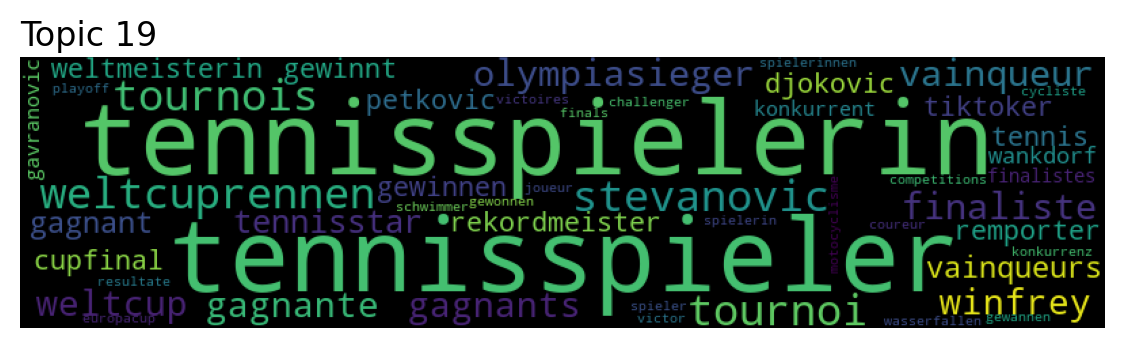

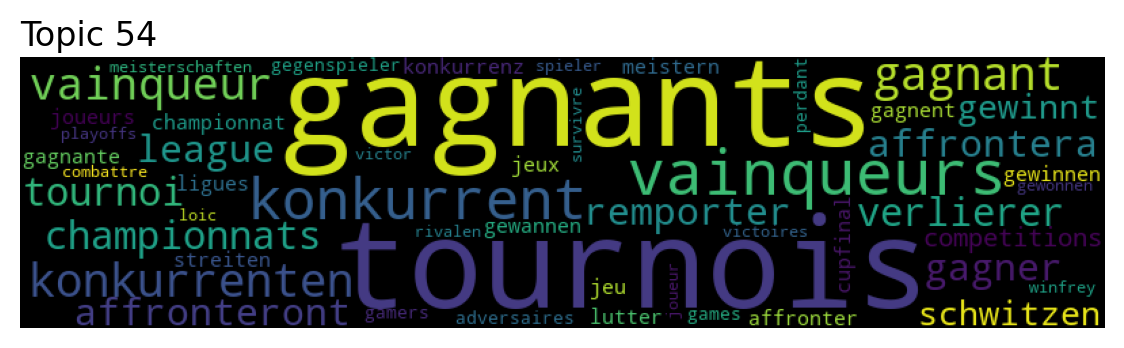

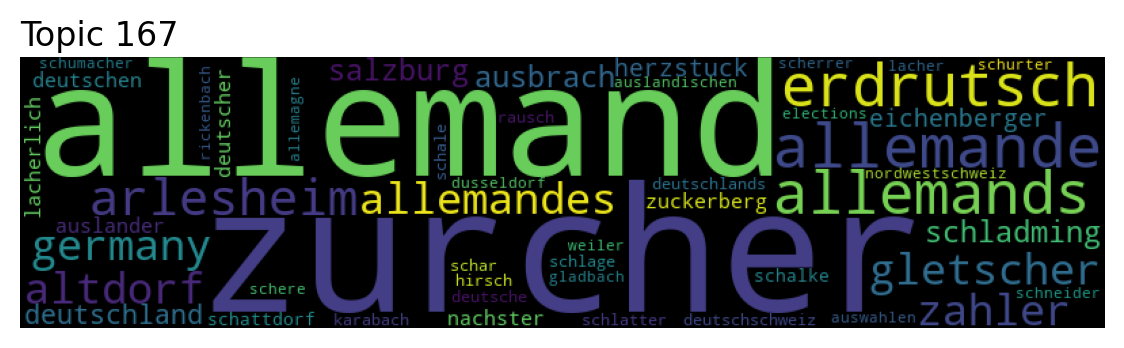

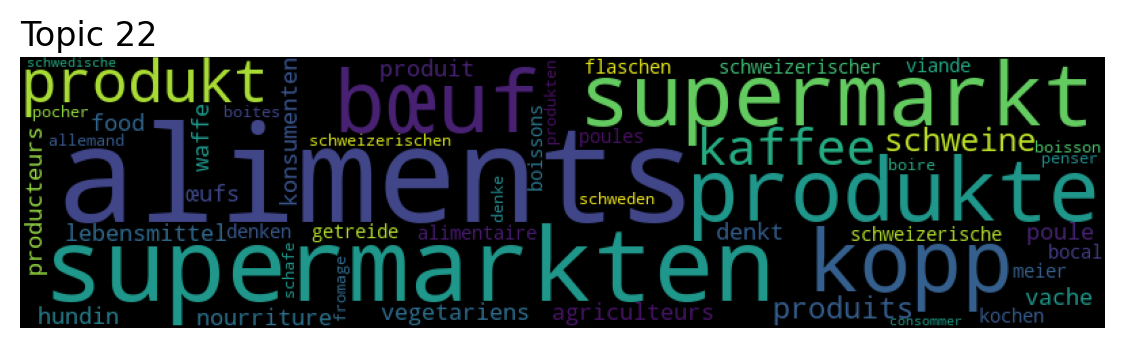

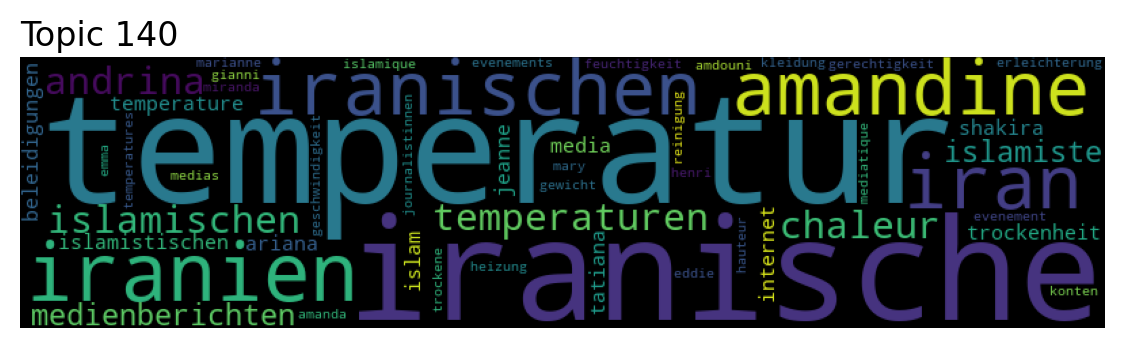

In [5]:
for topic in positive_correlation_topics:
    generate_topic_wordcloud(top2vec_model, topic, save=True)

### Positive correlation  
Topic 19  
Mostly tennis and sports, about winning
* tennisspielerin
* remporte
* tournoi
* olymbiasieger

Topic 54  
Mostly about winning, but not specificly about tennis, a lot of french words
* tournois
* vainqueurs
* gamers
* cupfinal

Topic 167  
Relates to regions in Zürich, inner Switzerland (Schattdorf), Austria, Germany, germans(swiss-germans)
* zurcher
* allemands
* salzburg
* nordwestschweiz

Topic 22  
Relates to food, supermarkets, products, meats
* aliments
* supermarkten
* vegetariens
* food

Topic 140  
Relates to weather conditions  and Iran
* temperatur
* iranien
* feuchtigkeit
* trockenheit

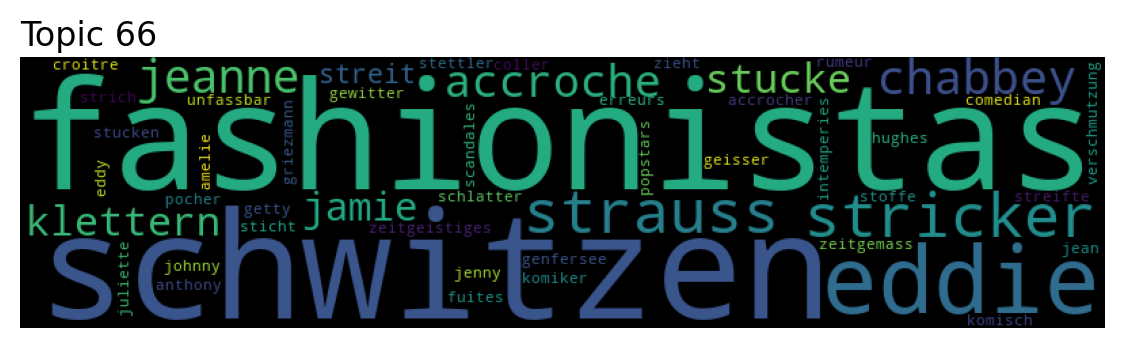

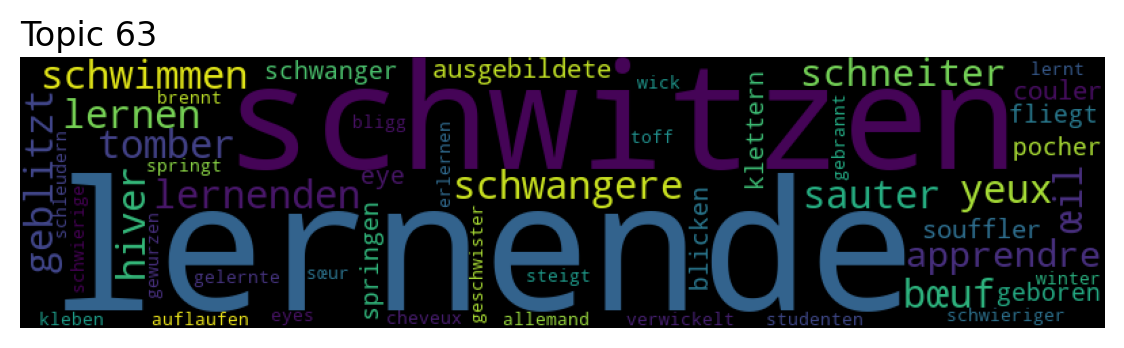

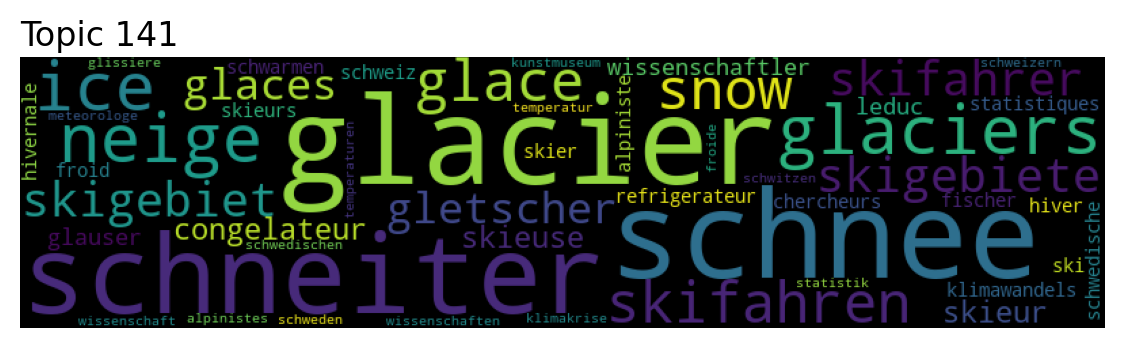

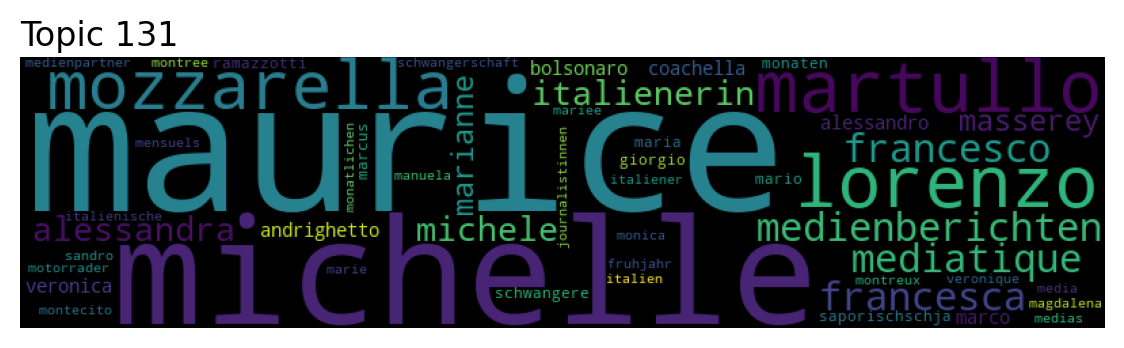

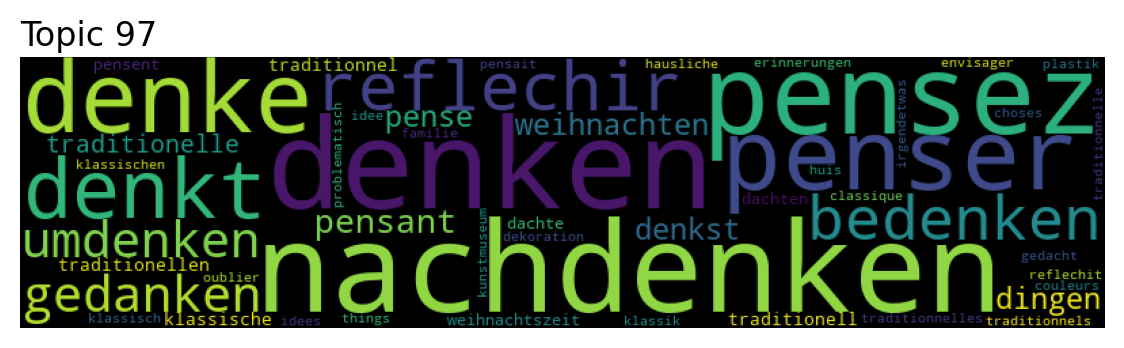

In [6]:
for topic in negative_correlation_topics:
    generate_topic_wordcloud(top2vec_model, topic, save=True)

Topic 66  
On the one hand many names of athletes or celebrities and then some distracting words like fashionistas or schwitzen. (schwitzen/sweating can be related to sports or stress)

Topic 63  
Siblings, apprenticeships/learning, pregnancy
* apprendre 
* soeur
* studenten
* lernende

Topic 141  
Glaciers, skiing, snow, statistics/science
* glacier
* neige
* schnee
* skifahren

Topic 131  
Again, many names, some italian names and mozzarella

Topic 97  
Thinking
* denken
* nachdenken
* penser
* reflechir